In [45]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
import cmocean.cm as cmo
import scipy.stats
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error
import sys

In [3]:
from cycler import cycler

fh = 16
my_cycler = (cycler(color=['#94c8d8','#FE9A84','#296540','#E63F39','#C3AAD1',
              '#D5AC5A','#F4B6C3','#B4BCCA','#DBD468','#B1D3E1','#8b1821']))
plt.rcParams['figure.figsize'] = (18,12)
plt.rcParams['axes.prop_cycle'] = my_cycler
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 8
plt.rcParams['legend.fontsize'] = 15
plt.rcParams['axes.labelsize'] = fh
plt.rcParams['xtick.labelsize'] = fh
plt.rcParams['ytick.labelsize'] = fh
plt.rcParams['axes.titlesize'] = fh+2

# Original data

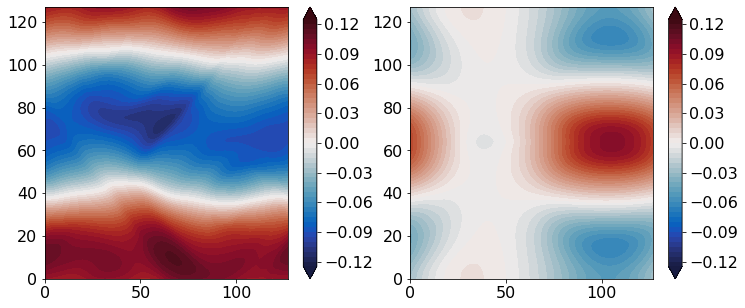

In [4]:
res = 128
var = 'xvel'

dataset_fb = f'data/pr-dns/data/out-entrainment2dm_d_0.512_g_{res}_init2/pr_dns_{var}.npy'
dataset_nfb = f'data/pr-dns/data/out-entrainment2dm_d_0.512_g_{res}_init1_no_fb/pr_dns_{var}.npy'

data1 =  np.load(dataset_fb)
data2 = np.load(dataset_nfb)

ii = np.arange(res)

fig,axes = plt.subplots(1,2,figsize=(12,5))
cr = np.arange(-0.30, 0.301, 0.03)
cr = np.arange(-0.125,0.1251,0.005)

a1 = axes[0].contourf(ii,ii,data1[2000,:,:],cr, extend='both',cmap=cmo.balance)
a2 = axes[1].contourf(ii,ii,data2[2000,:,:],cr, extend='both',cmap=cmo.balance)

fig.colorbar(a1, ax=axes[0])
fig.colorbar(a2, ax=axes[1])

del data1
del data2

# train perf

In [3]:
def eval_loss(log_name):
    log1 = pd.read_csv(log_name,sep='\s+',header=None)
    train_loss =  np.array([float(i.split('=')[1]) for i in log1[8].values])
    test_loss = np.array([float(i.split('=')[1]) for i in log1[9].values])
    
    return train_loss, test_loss

Text(0.5, 1.0, 'Testing')

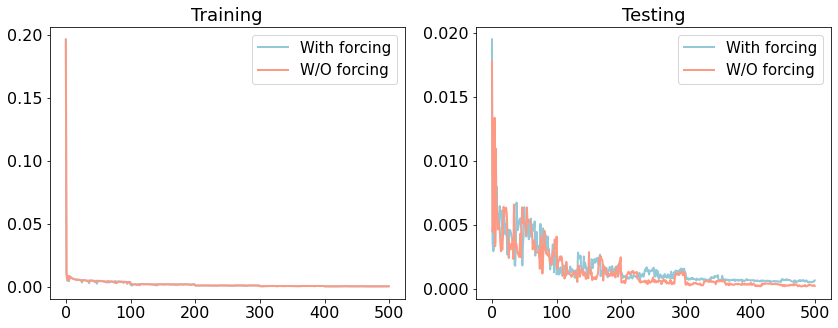

In [12]:
train_loss, test_loss = eval_loss(f'logs//FNO_log_xvel_r_128')
train_loss1, test_loss1 = eval_loss(f'logs//FNO_log_xvel_r_128_nf')

fig, axes = plt.subplots(1,2,figsize=(14,5))

axes[0].plot(train_loss, label='With forcing')
axes[0].plot(train_loss1, label='W/O forcing')
axes[0].legend()
axes[0].set_title("Training")

axes[1].plot(test_loss,label='With forcing')
axes[1].plot(test_loss1,label='W/O forcing')
axes[1].legend()
axes[1].set_title("Testing")


## data

In [5]:
data_path = ['FNO/pr_dns/tests/FNO_out_xvel_r_128.npy',
             'FNO/pr_dns/tests/FNO_out_xvel_r_128_nfb.npy']

(2, 1000, 1, 128, 128)
(2, 1000, 1, 128, 128)


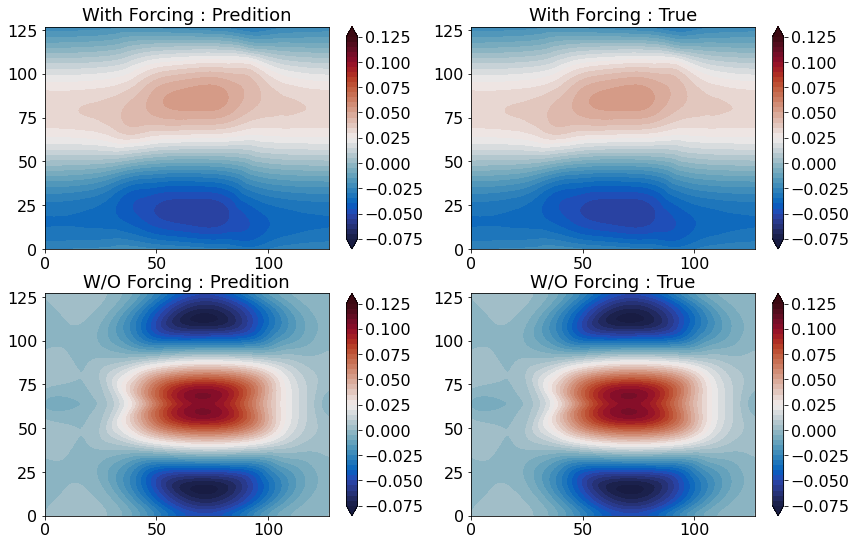

In [12]:
fig,axes = plt.subplots(2,2,figsize=(14,9))

cr = np.arange(-0.075,0.1251,0.005)
ii = np.arange(res)

exp_names = ['With Forcing','W/O Forcing']

for i, p in enumerate(data_path):
    data = np.load(p)
    print(data.shape)
    a1 = axes[i][0].contourf(ii,ii,data[0,0,0,:,:],cr, extend='both',cmap=cmo.balance)
    a2 = axes[i][1].contourf(ii,ii,data[0,0,0,:,:],cr, extend='both',cmap=cmo.balance)
    
    axes[i][0].set_title(f'{exp_names[i]} : Predition')
    axes[i][1].set_title(f'{exp_names[i]} : True')
    
    fig.colorbar(a1, ax=axes[i][0])
    fig.colorbar(a2, ax=axes[i][1])
    
    

FNO/ResNet/tests/ResNet_out_xvel_r_64.npy
FNO/ResNet/tests/ResNet_out_xvel_r_64_cont.npy


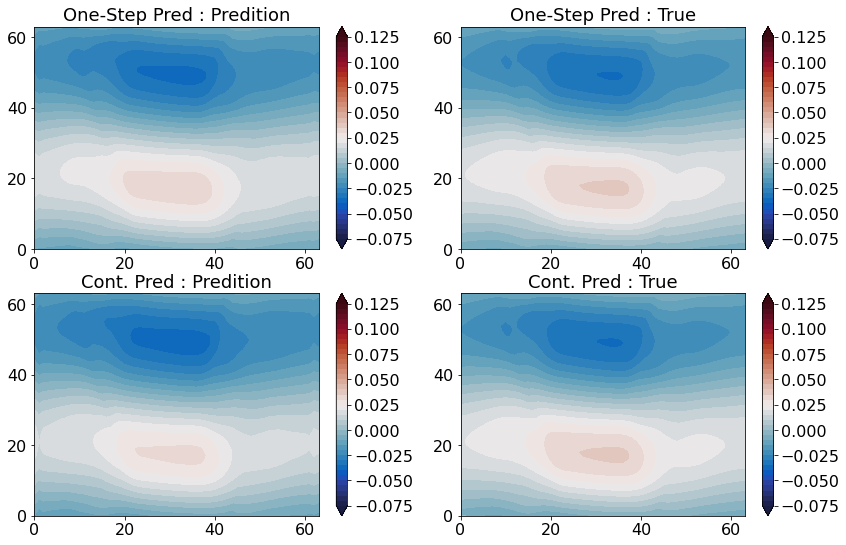

In [56]:
fig,axes = plt.subplots(2,2,figsize=(14,9))

res = 64
cr = np.arange(-0.075,0.1251,0.005)
ii = np.arange(res)

exp_names = ['One-Step Pred','Cont. Pred']
data_path = ['FNO/ResNet/tests/ResNet_out_xvel_r_64.npy',
            'FNO/ResNet/tests/ResNet_out_xvel_r_64_cont.npy']

for i, p in enumerate(data_path):
    
    data = np.load(p)
    print(p)
    a1 = axes[i][0].contourf(ii,ii,data[0,51,0,:,:],cr, extend='both',cmap=cmo.balance)
    a2 = axes[i][1].contourf(ii,ii,data[1,51,0,:,:],cr, extend='both',cmap=cmo.balance)
    
    axes[i][0].set_title(f'{exp_names[i]} : Predition')
    axes[i][1].set_title(f'{exp_names[i]} : True')
    
    fig.colorbar(a1, ax=axes[i][0])
    fig.colorbar(a2, ax=axes[i][1])
    
    mse1 = np.zeros(data.shape[0])
    
    for i in range(data.shape[0]):
        mse1[i] = mean_squared_error(data[i,0,0,:,:].reshape(-1),data[i,0,0,:,:].reshape(-1))
    

    plt.plot(mse1)

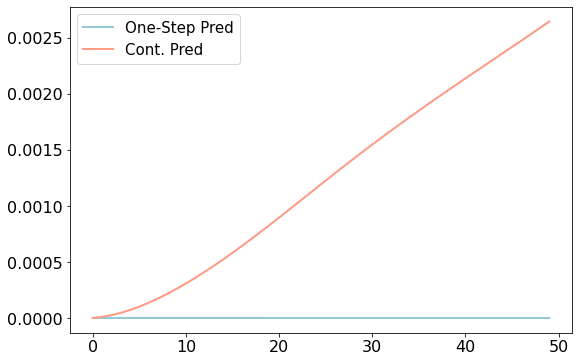

In [69]:
labels=['']

fig,axes = plt.subplots(1,1,figsize=(9,6))

for i, p in enumerate(data_path):    
    data = np.load(p)
    mse1 = np.zeros(data.shape[1])
    for j in range(data.shape[1]):
        mse1[j] = mean_squared_error(data[0,j,0,:,:].reshape(-1),data[1,j,0,:,:].reshape(-1))
    
    
    axes.plot(mse1[:50],label=exp_names[i])
    
axes.legend()
